Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [198]:
import pandas as pd
df_dublin = pd.read_csv('/Users/ruu/documents/LHL/Project-Statistical-Modelling/data/dublin.csv')
df_yelp = pd.read_csv('/Users/ruu/documents/LHL/Project-Statistical-Modelling/data/yelp.csv', index_col=0)

# Grouping df_yelp by the coordinates and calculating aggregate values
df_agg = df_yelp.groupby(['bike_lat','bike_lon']).agg(num_venues=('name','count'),avg_rating=('rating','mean'), min_distance=('distance','min'))

# Merging df_agg and df_dublin together using the coordinates as the keys
df_final = pd.merge(df_dublin, df_agg, left_on=['latitude','longitude'], right_on=['bike_lat','bike_lon'], how='inner')
df_final

,latitude,longitude,names,num_bikes,num_venues,avg_rating,min_distance
0,53.354929,-6.269425,WESTERN WAY,40,33,2.312121,109.440852
1,53.349013,-6.260311,PRINCES STREET / O'CONNELL STREET,23,50,4.140000,50.119272
2,53.336074,-6.252825,FITZWILLIAM SQUARE WEST,30,50,3.026000,105.914680
3,53.351182,-6.269859,BOLTON STREET,20,50,3.566000,18.786974
4,53.354663,-6.278681,GRANGEGORMAN LOWER (SOUTH),40,7,4.357143,448.380658
...,...,...,...,...,...,...,...
110,53.343456,-6.287409,JAMES STREET,40,20,2.965000,80.784958
111,53.345203,-6.247163,SANDWITH STREET,40,50,3.652000,121.625181
112,53.347884,-6.248048,CUSTOM HOUSE QUAY,30,50,3.656000,25.236914
113,53.344115,-6.237153,HANOVER QUAY,40,31,3.329032,45.281511


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

A series of scatter plots were created to explore potential relationships between the dependent variable (number of bikes available at each station) and the independent variables (number of nearby coffee shops, average coffee shop rating, and minimum distance to a coffee shop in meters). The visualizations did not reveal any clear patterns or trends, indicating no apparent linear relationship between the variables. Based on the visualizations, it looks like the correlation cofficient, r, for each pairing is close to zero.

Text(0, 0.5, 'Number of Bikes')

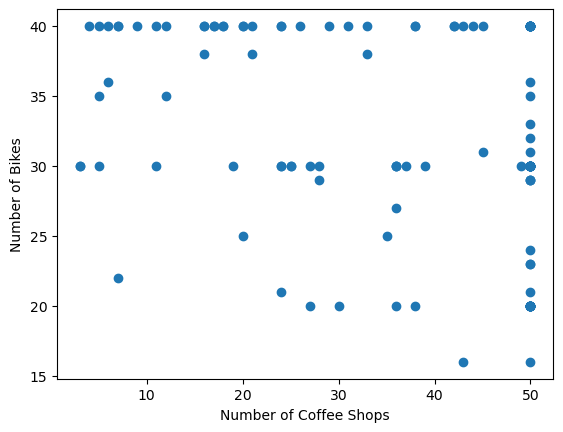

In [199]:
import matplotlib.pyplot as plt
plt.scatter(df_final['num_venues'], df_final['num_bikes'])
plt.xlabel('Number of Coffee Shops')
plt.ylabel('Number of Bikes')

Text(0, 0.5, 'Number of Bikes')

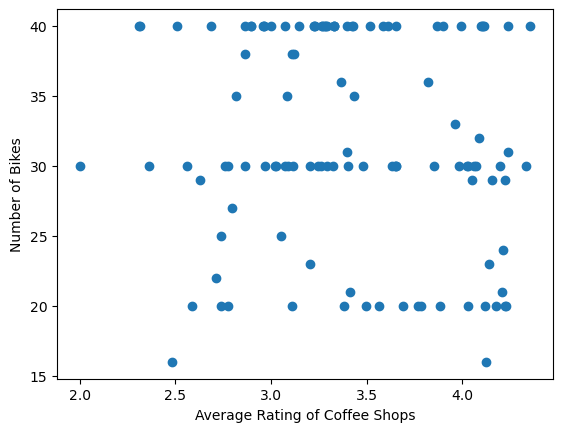

In [200]:
import matplotlib.pyplot as plt
plt.scatter(df_final['avg_rating'], df_final['num_bikes'])
plt.xlabel('Average Rating of Coffee Shops')
plt.ylabel('Number of Bikes')

Text(0, 0.5, 'Number of Bikes')

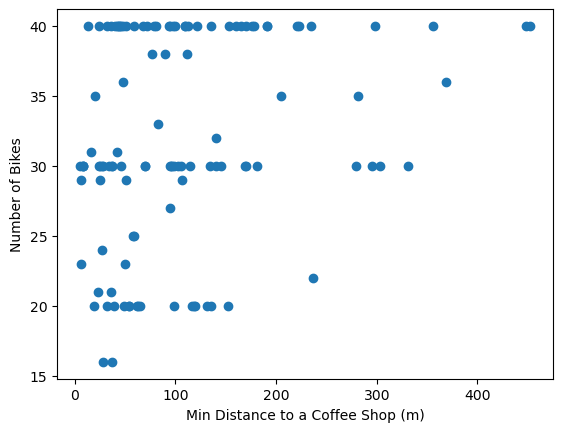

In [201]:
import matplotlib.pyplot as plt
plt.scatter(df_final['min_distance'], df_final['num_bikes'])
plt.xlabel('Min Distance to a Coffee Shop (m)')
plt.ylabel('Number of Bikes')

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [202]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('/Users/ruu/documents/LHL/Project-Statistical-Modelling/data/project_2.db')

df_agg.to_sql(name='yelp_agg', con=conn, if_exists='replace',index=True)
df_dublin.to_sql(name='dublin', con=conn, if_exists='replace',index=False)


115

Look at the data before and after the join to validate your data.

In [203]:
# Number of rows in df_dublin and df_agg from before the join are identical
print(pd.read_sql('SELECT COUNT(*) AS total_rows FROM dublin;', conn))
print(pd.read_sql('SELECT COUNT(*) AS total_rows FROM yelp_agg;', conn))

   total_rows
0         115
   total_rows
0         115


In [204]:
# Data after the join are also identical
query = """
SELECT  d.latitude, 
        d.longitude, 
        d.num_bikes,
        d.names,
        y.num_venues,
        y.avg_rating, 
        y.min_distance
FROM    yelp_agg as y
        JOIN dublin as d
        ON d.latitude=y.bike_lat AND d.longitude=y.bike_lon
;
"""
print(pd.read_sql(query, conn))

      latitude  longitude  num_bikes                              names  \
0    53.354929  -6.269425         40                        WESTERN WAY   
1    53.349013  -6.260311         23  PRINCES STREET / O'CONNELL STREET   
2    53.336074  -6.252825         30            FITZWILLIAM SQUARE WEST   
3    53.351182  -6.269859         20                      BOLTON STREET   
4    53.354663  -6.278681         40         GRANGEGORMAN LOWER (SOUTH)   
..         ...        ...        ...                                ...   
110  53.343456  -6.287409         40                       JAMES STREET   
111  53.345203  -6.247163         40                    SANDWITH STREET   
112  53.347884  -6.248048         30                  CUSTOM HOUSE QUAY   
113  53.344115  -6.237153         40                       HANOVER QUAY   
114  53.354845  -6.247579         30                   KILLARNEY STREET   

     num_venues  avg_rating  min_distance  
0            33    2.312121    109.440852  
1          